<a href="https://colab.research.google.com/github/lake198/Study-AI/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 1. 線形回帰モデル

線形回帰モデルは、説明変数$x$と目的変数$y$の関係が線形であると仮定する。\
$x$が一つ（1次元）の場合は\
\
$$ y=wx+b $$\
$x$がm個（m次元）の場合は\
\
$$ y=w_1x_1 + w_2x_2 + \cdots + b
    =(w_1,w_2,\cdots,w_m)\cdot \left(
    \begin{array}{c}
      x_1 \\
      x_2 \\
      \vdots \\
      x_m
    \end{array}
    \right) +b 
= \bf{w^Tx+b} \cdots(1)
$$
\
wは重み、bはバイアスと呼ばれ、線形モデルを特徴づけるパラメータである。モデルによる予測結果と実際の結果の差異が最も小さくなるように$w$と$b$を決定することを回帰と呼ぶ。\
ある入力値$x$に対して実際の結果を$t$（目標値と呼ぶ）、モデルによる計算結果を$y$（予測値と呼ぶ）としたとき、モデルと結果の差異は誤差$l$として次式で表される。\
\
$$
l=t-y
$$
\
今、$n$個のデータがある時、全ての入力$x$に対する誤差$l$の2乗の和$L$は次式で計算される。\
\
$$
L=\sum_{i=1}^n{l_i}^2=\sum_{i=1}^n{(t_i-y_i)}^2\cdots(2)
$$
\
この誤差二乗平均$L$を最小化する$w$と$b$が、この線形モデルを最適化するために求めるパラメータとなる。またこの$L$はモデルを最適化するための関数であるため、目的関数と呼ばれる。\
\
(1.1)式において$b=w_0\cdot1$と置くと\
\
$$
y=(w_0, w_1,\cdots,w_m)\cdot \left(
\begin{array}{c}
1 \\
x_1 \\
\vdots \\
x_m
\end{array}
\right)
+b=\bf{w}^T\bf{x}\cdots(3)
$$
\
(2)式を変形して\
\
$$
L=[t_1-y_1, t_2-y_2, \cdots]
\left[ \begin{array}{c}
t_1-y_1 \\ t_2-y_2 \\ \vdots \\
\end{array} \right]
= \bf{(t-y)}^T \bf{(t-y)} \cdots(4)
$$
\
(3)において$\bf{w}^T \bf{x} = \bf{x}^T \bf{w}$より\
\
$$
\bf{y} = \left[\begin{array}{c}
y_1 \\ y_2 \\ \vdots \\ y_n \\
\end{array} \right]
=\left[ \begin{array}{c}
\bf{x}_1^T \\ \bf{x}_2^T \\ \vdots \\ \bf{x}_n^T \\
\end{array} \right] \bf{w}
=\left[ \begin{array}{cccc}
  x_{10} & x_{11} & \cdots & x_{1m} \\
  x_{20} & x_{21} & \cdots & x_{2m} \\
  \vdots & \vdots & &\vdots \\
  x_{n0} & x_{n1} & \cdots & x_{nm} \\
\end{array} \right] \bf{w}
=\bf{X} \bf{w} \cdots(5)
$$
\
(5)を(4)に代入して\
\
$$
L=(\bf{t} - \bf{X} \bf{w})^T(\bf{t} - \bf{X} \bf{w})
=\bf{t}^T\bf{t} - \bf{t}^T\bf{X}\bf{w} - \bf{w}^T\bf{X}^T\bf{t} + \bf{w}^T\bf{X}^T\bf{X}\bf{w}\cdots(6)
$$
\
ここで$\bf{t}^T$、$\bf{X}$、$\bf{w}$はそれぞれ$(1\times N)$、$(N\times M)$、$(M \times 1)$の行列であるため$\bf{t}^T\bf{X}\bf{w}$はスカラ値である。従って\
\
$$
\bf{t}^T\bf{X}\bf{w}=(\bf{t}^T\bf{X}\bf{w})^T=\bf{w}^T\bf{X}^T\bf{t}\cdots(7)
$$
\
(6)(7)式より\
\
$$
L=\bf{t}^T\bf{t} -2 \bf{t}^T\bf{X}\bf{w} + \bf{w}^T\bf{X}^T\bf{X}\bf{w}\cdots(8)
$$
\
$L$を各$w_i$の2次関数としてみた場合は下に凸な形となるため、$L$を最小とするパラメータ$w$を求めるためには $\frac{\partial L}{\partial w}=0$ を解けばよい。 $\frac{\partial}{\partial w}(\bf{w}^T\bf{A}\bf{w})=\bf{w}^T(\bf{A}+\bf{A}^T)$を用いると、(8)式より\
\
$$
\frac{\partial L}{\partial w}= -2 \bf{t}^T\bf{X} + 2\bf{w}^T\bf{X}^T\bf{X}=0 \\
\bf{w}^T\bf{X}^T\bf{X}=\bf{t}^T\bf{X}
$$
\
両辺を転置して\
\
$$
\bf{X}^T\bf{X}\bf{w}=\bf{X}^T\bf{t}
$$
\
両辺に$(\bf{X}^T\bf{X})^{-1}$を掛けて\
\
$$
\bf{w}=(\bf{X}^T\bf{X})^{-1}\bf{X}^T\bf{t}
$$





In [ ]:
# 線形結合
def mul_linear_func(x):
    ww = [1., 0.5, 2., 1.]
    print('true_w = (' + ', '.join(['{:.2f}'.format(v) for v in ww]) + ')')
    return ww[0] + ww[1] * x[:, 0] + ww[2] * x[:, 1] + ww[3] * x[:, 2]

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def add_one(x):
    return np.concatenate([np.ones((x.shape[0],1)), x], axis=1)

n_sample = 100
x_dim = 3
var = .2

# 訓練データ生成
X = np.random.random((n_sample, x_dim))
y_true = mul_linear_func(X)
y_train = add_noise(y_true, var)

# x_i0 = 1 をデータ行列に追加
X_train = add_one(X)

# パラメータwを計算
pinv = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T)
w = np.dot(pinv, y_train)

print('pred_w = (' + ', '.join(['{:.2f}'.format(v) for v in w]) + ')')


true_w = (1.00, 0.50, 2.00, 1.00)
pred_w = (0.95, 0.48, 1.99, 1.13)


# 非線形回帰モデル

説明変数$x$と目的変数$y$の関係が線形でない場合、非線形回帰モデルを用いる。非線形モデルは既知の非線形関数 $\phi(x)$ とモデルの特徴パラメータの線形結合であり、1-(5)式において $X \rightarrow \Phi(X)$ と置き換えた形で表される。\
\
$$
\bf{y} = \Phi(\bf{X}) \bf{w}
$$
\
モデルを最適化するための目的関数を各入力に対する二乗誤差の和とした場合、1-(9)式において $X \rightarrow \Phi(X)$ と置き換えることで$\bf{w}$を求めることができる。\
\
$$
\bf{w}=(\Phi(\bf{X})^T\Phi(\bf{X}))^{-1}\Phi(\bf{X})^T\bf{t}
$$
\
非線形回帰モデルは線形回帰モデルと比較して高い表現力を持つが、その反面で過学習が起きやすいというデメリットもある。また最適な基底関数を選択するためには、ある程度の予備知識や試行錯誤が必要となる場合もある。

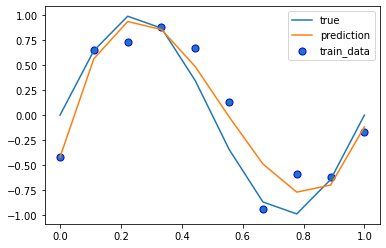

In [ ]:
def sin_func(x):
    return np.sin(2 * np.pi * x) 

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs, ys_true, ys):
    plt.scatter(xs, ys,facecolor="none", edgecolor="b", s=50,  label="training data")
    plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
    plt.legend()

# 基底関数 φ=x^k
def polynomial_features(xs, degree=3):
    X = np.ones((xs.shape[0], degree+1))
    for i in range(degree+1):
      X[:,i] = xs**i
    return X

n_sample = 10
var = .25

#データの作成
xs = np.linspace(0, 1, n_sample)
ys_true = sin_func(xs)
ys = add_noise(ys_true, var)

Phi = polynomial_features(xs)
Phi_inv = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T)
w = np.dot(Phi_inv, ys)

ys_pred = np.dot(Phi, w)

#結果の描画
plt.scatter(xs, ys, edgecolor="b", s=50, label="train_data")
plt.plot(xs, ys_true, label="true")
plt.plot(xs, ys_pred, label="prediction")
plt.legend()
plt.show()


# ロジスティック回帰モデル

ロジスティック回帰は、説明変数 $x$ に対する目的変数 $y$ を0または1の2値とし、$y=1$ となる確率を予測するためのモデルである。入力値 $x$ と重みパラメータ $w$ の線形結合をシグモイド関数$\sigma$に入力した結果が求める確率となる。\
\
$$
P(y=1 \mid {\bf{x}}) = \sigma({\bf{w^Tx}})\cdots(1)
$$
\
シグモイド関数は次式で定義される。\
\
$$
\sigma(x) = \{ 1+\mathrm{exp}(-x) \}^{-1}\cdots(2)
$$
\
今、1回の試行において $y=1$ となる確率を $p$ とすると、結果が $y$ となる確率 $P(y)$ は次式となる。\
\
$$
P(y) = p^{y}(1-p)^{1-y}
$$
\
次に $n$ 回の試行を行ったとき、結果 ${\bf{y}}=(y_1, y_2, \cdots, y_n)$ が同時に起こる確率を尤度と呼ぶ。尤度 $L$ は確率モデルがどの程度、実際の結果に則しているかを示す指標であり、次式で表される。\
\
$$
L = \prod_{i=1}^n p_i^{y_i}(1-p_i)^{1-y_i}
$$
\
与えられたデータの下で尤度が最大となるようにモデルのパラメータを決定する方法を最尤推定と呼ぶ。尤度は、1より小さな値の積となるため、算出結果は非常に小さな値になやすい。そこで最尤推定を行う際は、尤度の対数をとった対数尤度 $\mathrm{log}L$ を用いる。対数関数は単調増加関数であるため、尤度を最大化するには対数尤度を最大にすればよい。\
\
$$
\mathrm{log}L = \sum_{i=1}^n \{ y_i \mathrm{log}(p_i)+(1-y_i) \mathrm{log}(1-p_i) \}\cdots(3)
$$
\
ここで、モデルの目的関数を $E =-\mathrm{log}L$ と定義する。対数尤度を最大にすることは、目的関数 $E$ を最小化することと等しい。$E$ を最小化するためには、勾配降下法を用いる。次式によってパラメータ $\bf{w}$ の更新を繰り返し、最終的に $\bf{w}$ が収束したところを最適解として決定する。ここでの $\eta$ は学習率と呼ばれるハイパーパラメータであり、この値を変更して収束のしやすさを調整する。\
\
$$
{\bf w}_{k+1}={\bf w}_{k}-\eta \frac{\partial E}{\partial {\bf w}}
$$
\
(3)式より\
\
$$
\frac{\partial E}{\partial {\bf w}}
=-\frac{\partial \mathrm{log}L}{\partial {\bf w}}
=-\sum_{i=1}^n \left( \frac{y_i}{p_i}-\frac{1-y_i}{1-p_i} \right)\frac{\partial p_i}{\partial {\bf w}}\cdots(4)
$$
\
(1)(2)より、確率 $p$ は $z={\bf w}^T{\bf x}$ のシグモイド関数 $\sigma(z)$ と書けるので、\
\
$$
\frac{\partial p_i}{\partial {\bf w}}
=\frac{\partial \sigma(z_i)}{\partial z_i}\frac{\partial z_i}{\partial {\bf w}}
=\sigma(z_i)(1-\sigma(z_i)){\bf x_i}
=p_i(1-p_i){\bf x_i}
$$
\
これを(4)式に代入して\
\
$$
\begin{eqnarray}
\frac{\partial E}{\partial {\bf w}}
&=& -\sum_{i=1}^n \left( \frac{y_i}{p_i}-\frac{1-y_i}{1-p_i} \right)p_i(1-p_i){\bf x_i} \\
&=&-\sum_{i=1}^n \left\{ \frac{y_i(1-p_i)-p_i(1-y_i)}{p_i(1-p_i)} \right\} p_i(1-p_i){\bf x_i} \\
&=&-\sum_{i=1}^n \left(y_i-p_i \right){\bf x_i}
\end{eqnarray}
$$




 gd 235 [-0.36954104  1.43223666  1.9395708 ]
sgd 499 [-0.06327449  0.89565372  0.86971274]


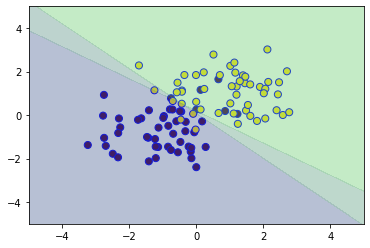

In [ ]:
def gen_data(n_sample, harf_n_sample):
    x0 = np.random.normal(size=n_sample).reshape(-1, 2) - 1.
    x1 = np.random.normal(size=n_sample).reshape(-1, 2) + 1.    
    x_train = np.concatenate([x0, x1])
    y_train = np.concatenate([np.zeros(harf_n_sample), np.ones(harf_n_sample)]).astype(np.int)
    return x_train, y_train

def plt_data(x_train, y_train):
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor="b", s=50, label="training data")
    plt.legend()
    plt.show()

def add_one(x):
    return np.concatenate([np.ones((x.shape[0],1)), x], axis=1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def random_data_select(x_train, y_train, n=1):
    idx = np.random.choice(x_train.shape[0], n, replace=False)
    x_train = x_train[idx]
    y_train = y_train[idx]
    return x_train, y_train

def sgd(x_train, y_train, max_iter, eta, n):
    w = np.zeros(x_train.shape[1])
    for i in range(max_iter):
        w_prev = np.copy(w)

        # 訓練データからn個のデータをランダムに取得
        new_x_train, new_y_train = random_data_select(x_train, y_train, n)

        sigma = sigmoid(np.dot(new_x_train, w))
        grad = np.dot(new_x_train.T, (sigma - new_y_train))
        # パラメータ更新
        w -= eta * grad
        if np.allclose(w, w_prev):
            return i, w
    return i, w

n_sample = 100
harf_n_sample = 50
var = .2

#データ作成
x_train, y_train = gen_data(n_sample, harf_n_sample)

# #データ表示
# plt_data(x_train, y_train)

x_train = add_one(x_train)
max_iter=500
eta = 0.01

# 勾配降下法
i, w1 = sgd(x_train, y_train, max_iter, eta, 100)
print(' gd', i, w1)

# 確率的勾配降下法
i, w2 = sgd(x_train, y_train, max_iter, eta, 1)
print('sgd', i, w2)

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

x_test = add_one(xx)
proba1 = sigmoid(np.dot(x_test, w1))
y_pred1 = np.zeros((100*100), dtype=np.bool)
y_pred1[proba1>0.5]=1

proba2 = sigmoid(np.dot(x_test, w2))
y_pred2 = np.zeros((100*100), dtype=np.bool)
y_pred2[proba2>0.5]=1

plt.scatter(x_train[:, 1], x_train[:, 2], c=y_train, edgecolor="b", s=50)
plt.contourf(xx0, xx1, proba1.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.contourf(xx0, xx1, proba2.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.show()


# 主成分分析

多変量のデータを持つ構造において、データの次元があまりに大きい場合、データが表現できる組み合わせが多くなりすぎてしまい学習がうまく行えないという問題が起こる。また仮に4次元以上のデータがあった場合、次元を3次元以下に削減することでデータの可視化が容易になる。\
\
主成分分析では、新たな変数 ${\bf z}$ を主成分として、変数 ${\bf x}$ と重みパラメータ ${\bf w}$ の線形結合によって定義する。重み ${\bf w}$ は ${\bf z}$ の射影軸を表す方向ベクトルであるため、制約条件として $\|{\bf w}\|=1$ を課して単位ベクトルとする。この時 ${\bf z}$ の分散が最大となるような成分を第1主成分と呼ぶ。さらに第1主成分の射影軸に直交し、かつ分散が最大となるような成分を第2主成分と呼ぶ。最終的に、M次元のデータは第M次元までの主成分を持つ。\
\
今、$n$ 個の $m$ 次元のデータ ${\bf X}$ を考える。${\bf z}={\bf X}{\bf w}$ と線形変換すると、${\bf z}$ の分散は\
\
$$
\begin{eqnarray}
Var({\bf z}) &=& \frac{1}{n}\bar{\bf z}^T\bar{\bf z} \\
&=&\frac{1}{n}(\bar{\bf X}{\bf w})^T(\bar{\bf X}{\bf w}) \\
&=& \frac{1}{n}{\bf w}^T\bar{\bf X}^T\bar{\bf X}{\bf w}\cdots(1)
\end{eqnarray}
$$
\
制約条件 $\|{\bf w}\|=1$ より\
\
$$
{\bf w}^T{\bf w}=1\cdots(2)
$$
\
(2)式を満たし、かつ(1)式の分散 $Var({\bf a})$ を最大化するためには、ラグランジュ関数 $L({\bf w})$ について、$\frac{\partial L}{\partial {\bf w}}=0$ を解けばよい。\
\
$$
L({\bf w})=\frac{1}{n}{\bf w}^T\bar{\bf X}^T\bar{\bf X}{\bf w}+λ(1-{\bf w}^T{\bf w})
$$
\
$$
\begin{eqnarray}
\frac{\partial L}{\partial {\bf w}}
&=& \frac{1}{n}{\bf w}^T\{\bar{\bf X}^T\bar{\bf X}+{(\bar{\bf X}^T\bar{\bf X})}^T\}
-λ{\bf w}^T(I+I^T) \\
&=& 2\frac{1}{n}{\bf w}^T \bar{\bf X}^T\bar{\bf X}-2λ{\bf w}^T=0
\end{eqnarray}
$$
\
$$
\frac{1}{n}{\bf w}^T \bar{\bf X}^T\bar{\bf X}=λ{\bf w}^T
$$
\
$$
\frac{1}{n}\bar{\bf X}^T\bar{\bf X}{\bf w}=λ{\bf w}\cdots(3)
$$
\
(3)式を解くことは、入力データ ${\bf X}$ の分散共分散行列 $Var({\bf X})$ について固有値問題を解く事に帰着する。





eig val [2.27245954 0.61151812]
eig vec [[-0.9101601307553581, 0.41425660692786703], [-0.41425660692786703, -0.9101601307553581]]
直交性の確認 -1.9268598161119448e-17


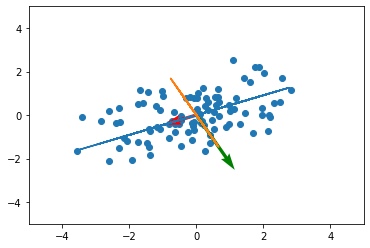

In [ ]:
def gen_data(n_sample):
    mean = [0, 0]
    cov = [[2, 0.7], [0.7, 1]]
    return np.random.multivariate_normal(mean, cov, n_sample)

def get_moments(X):
    mean_X = X.mean(axis=0)
    cov_X = np.dot((X - mean_X).T, X - mean_X) / (len(X) - 1)
    return mean_X, cov_X

def plt_result(X, Z, eig_vectors):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

    # angles='xy'の記述がないとベクトルの向きが描画領域のスケールと一致しない
    # 第１主成分
    plt.plot(Z[:,0]*eig_vectors[0,0], Z[:,0]*eig_vectors[1,0])
    plt.quiver(0, 0, eig_vectors[0,0], eig_vectors[1,0], angles='xy', width=0.01, scale=10, color='red')
    # 第２主成分
    plt.plot(Z[:,1]*eig_vectors[0,1], Z[:,1]*eig_vectors[1,1])
    plt.quiver(0, 0, eig_vectors[0,1], eig_vectors[1,1], angles='xy', width=0.01, scale=5, color='green')

n_sample = 100

X = gen_data(n_sample)

# 分散共分散行列を取得
mean_X, cov_X = get_moments(X)

# 固有値と固有ベクトルを計算
eig_vals, eig_vectors = np.linalg.eigh(cov_X)

# 固有値の大きい順にソート
idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vectors = eig_vectors[:,idx]

print('eig val', eig_vals)
print('eig vec', eig_vectors.tolist())
print('直交性の確認', np.dot(eig_vectors[:,0],eig_vectors[:,1]))

# 主成分を計算
Z = np.dot(X, eig_vectors)
plt_result(X, Z, eig_vectors)


# サポートベクターマシン

サポートベクターマシン（SVM：Support Vector Machine)は教師あり学習を行う機械学習もでるの一種である。回帰と分類のどちらにも対応できるが、主に分類タスクに使われる。サポートベクトルは、データを分割する境界に最も近いベクトルである。またサポートベクトルと境界との距離をマージンと呼び、SVMではこのマージンを最大化するように学習を行う。\
\
SVMを2クラス分類に用いる場合、入力 $x$ がどちらのクラスに属するかの結果 $y$ は次式で得られる。\
\
$$
y = sgnf(x)=
\begin{cases}
  {+1 \ (f(x) > 0)}\\
  {-1 \ (f(x) < 0)}
\end{cases}
$$
\
$f(x)$ は決定関数と呼ばれ、入力 ${\bf x}$ とパラメータ ${\bf w}, b$ との線形結合で表される。\
\
$$
f(x)= {\bf w}^T {\bf x}+b
$$
\
SVMにおいてマージンを最大化することは、以下の最適化問題を解くことに帰着する。\
\
$$
\underset{w,b,\xi}{\text{min}}\left[\frac{1}{2} \|{\bf w}\|^{2} +C\sum_{i=1}^n \xi_i\right] \\
{\text{subject to}} \qquad 
\begin{cases}
y_i({\bf w}^T{\bf x_i}+b) \ge 1-\xi_i \\
\xi_i \ge 0 
\end{cases}
\quad(i=1,2,\cdots ,n)
$$
\
ここで、$\xi_i$ はマージン内にあるデータや誤分類されたデータの誤差を表す変数であり、スラック変数と呼ばれる。また $C$ はこの誤差をどの程度許容するかを制御するためのハイパーパラメータであり、正の値をとる。また $C\rightarrow \infty$ の時、$\xi_i=0$ となり、全てのデータは境界で完全に分離される。このような分類をハードマージンと呼ぶ。それに対し $\xi_i>0$ の場合をソフトマージンと呼ぶ。\
\
ここで以下のラグランジュ関数 $L$ を目的関数として導入すると、この最適化問題は目的関数 $L$ の最大化問題に置き換わる。\
\
$$
L({\bf w}, b, \xi,{\bf \alpha},{\bf \mu}) = \frac{1}{2} { \|{\bf w}\| }^{2} +C\sum_{i=1}^n \xi_i
-\sum_{i=1}^n \alpha_i \left[ y_i({\bf w}^T{\bf x_i}+b)-1+\xi_i \right]
-\sum_{i=1}^n \mu_i \xi_i\cdots(1)
$$
\
$L$ の最大化条件は\
\
$$
\begin{eqnarray}
\frac{\partial L}{\partial {\bf w}} &=& {\bf w}-\sum_{i=1}^na_iy_i{\bf x_i}=0 \cdots(2) \\
\frac{\partial L}{\partial {\bf b}} &=& -\sum_{i=1}^n a_i y_i = 0 \cdots(3)\\
\frac{\partial L}{\partial {\bf \xi}} &=& C-a_i-\mu_i=0 \quad (i=1,2,\cdots,n)\cdots(4)
\end{eqnarray}
\\
$$
\
(2)~(4)式を(1)式に代入すると、\
\
$$
\begin{eqnarray}
L({\bf a}) &=& -\frac{1}{2}\sum_{i=1}^n \sum_{j=1}^n a_ia_jy_iy_j{\bf x_i}^T{\bf x_j}+\sum_{i=1}^na_i \\
&=& -\frac{1}{2} {\bf a}^T{\bf H}{\bf a}+\sum_{i=1}^na_i, \ 
H_{ij}=y_iy_j{\bf x_i}^T{\bf x_j} \\
\end{eqnarray} \cdots(5) \\
\text{subject to}
\begin{cases}
{\bf a}^T{\bf y}=0 \\
C \ge a_i \ge 0 \quad(i=1,2,\cdots,n)
\end{cases}
$$
\
(5)の最大化問題を解くには、勾配降下法によってパラメータ $a$ を更新する。制約条件 ${\bf a}^T{\bf y}=0$ については、 $z={\bf a}^T{\bf y}$ と置くいた場合、 $g(z)=\frac{1}{2}z^2$ は $z=0$ で最小値をとる2次関数である。従って、 $g(z)$ の極値を勾配降下法で求めればよい。学習率を $\eta_1,\eta_2$ と置くと、${\bf a}$ の更新式は\
\
$$
{\bf a}\leftarrow {\bf a}+\eta_1\frac{\partial L}{\partial {\bf a}}
={\bf a}+\eta_1({\bf 1}-{\bf Ha}) \\
{\bf a}\leftarrow {\bf a}-\eta_2\frac{\partial g(z)}{\partial {\bf a}}
=a-\eta_2 z \frac{\partial z}{\partial {\bf a}} 
=a-\eta_2({\bf a}^T{\bf y}){\bf y}\\
$$
\
ここで$L$ が最大化された時、(1)式より\
\
$$
\alpha_i \left[ y_i({\bf w}^T{\bf x_i}+b)-1+\xi_i \right]=0
$$
\
サポートベクトル以外の入力ベクトルについては、$y_i({\bf w}^T{\bf x_i}+b)>1$ であるため、$\alpha_i=0 $ となる。さらに(2)式より\
\
$$
{\bf w}=\sum_{i\in S}a_iy_i{\bf x_i}
$$
\
ただし、Sはサポートベクトルのインデックス集合である。さらに、サポートベクトルにおいては $y_i({\bf w}^T{\bf x_i}+b)=1$ が成り立つので、両辺に $y_i$ を掛けて式を整理すると\
\
$$
b=y_i-{\bf w}^T{\bf x_i}=y_i-\sum_{i\in S}a_iy_i{\bf x_i}^{T}{\bf x_i}
$$
\
従って、\
\
$$
b=\frac{1}{S}\sum_{s \in S} \left( y_{s}- \sum_{i\in S}a_iy_i{\bf x_i}^{T}{\bf x_i} \right) 
$$
\
線形分離でうまく分離できない場合、入力ベクトルを非線形変換し、データをより高い次元の空間に写像してから線形分離を行う。この時 ${\bf x_i}\rightarrow \phi({\bf x_i})$ の置き換えにより、$H_{ij}=y_iy_j\phi({\bf x_i})^T\phi({\bf x_j})$ となる。しかし、$\phi({\bf x_i})^T\phi({\bf x_j})$ の内積計算が膨大になってしまうため、この部分をさらにカーネル関数 $K({\bf x_i},{\bf x_j})$ で置き換える。\
\
$$
H_{ij}=y_iy_jK({\bf x_i},{\bf x_j})
$$
\
カーネル関数には多項式カーネルやガウスカーネルなど様々な形があり、データに合わせて適切なカーネルを選択する必要がある。


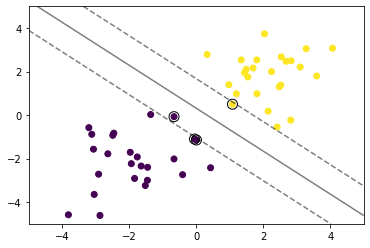

In [ ]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 2.
    x1 = np.random.normal(size=50).reshape(-1, 2) + 2.
    X_train = np.concatenate([x0, x1])
    ys_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    ys_train[ys_train==0]=-1
    return X_train, ys_train

X_train, t = gen_data()

n_samples = 50

# 線形カーネル
K = X_train.dot(X_train.T)
H = np.outer(t, t) * K

C = 1
eta1 = 0.01
eta2 = 0.001
n_iter = 1000

# a の更新
a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.clip(a, 0, C)

# サポートベクトル取得
index = np.where(a > 1e-8)
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

# 予測マップ生成
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)

# 訓練データを可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k')

# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
